# ASSIGNMENT 5 - INTRO TO MACHINE LEARNING | Decision Tree, Bagging, Random Forest and Boosting


> **FULL MARKS = 100**



**Note:** To submit the assignment, please follow the same steps and in assignments 1, 2, 3, 4. 

In this assignment we will cover the following topics:

1. **Decision Tree with KFold Cross Validation| SCORE : 40**
      
    References

    > https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

    > https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
      
    > https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


2. **Decision Tree with Bagging | SCORE : 20**

    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor

    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

3. **Random Forest | SCORE : 20**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

4. **Boosting | SCORE : 20**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

### 1. Decision Tree with KFord Cross Validation 
---



---

***EXERCISE NO. 1.1 | Score :40***

In [21]:
# Required Dataset

from sklearn.datasets import load_diabetes

# In the following exercises you will use the diabetes datasets for regression problems.
# Use your experience from previous exercises on how to use sklearn model, load data and do visualization.
# Please try to research about the datasets diabetes dataset

#Load necessary libraries for you 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

#Load the diabetes dataset
diabetes = load_diabetes()
#split the dataset with test_size = 0.20
X = diabetes.data
y = diabetes.target
regXtrain, regXtest, regYtrain, regYtest = train_test_split(X, y, test_size = 0.2)

print(f"Regression data : diabetes data")
print(f"xtrainShape : {regXtrain.shape}, ytrainShape : {regYtrain.shape}, xtestShape : {regXtest.shape}, ytestShape : {regYtest.shape}")


Regression data : diabetes data
xtrainShape : (353, 10), ytrainShape : (353,), xtestShape : (89, 10), ytestShape : (89,)


In [24]:
#You may print necessary dataset information to help you better understand this dataset 

print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [26]:
# Use the bosting diabetes dataset to achieve the following tasks
# An example link
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

# Tasks:
# 1. Create four decision tree regressor models, use max_depth size = 1,2,5,100
# 2. Fit model. You will have 4 different models for different depth sizes
# 3. Calculate the mean squared error of each model's prediction
# 4. Find the best max_depth

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#create decision tree regressor
regr_1 = DecisionTreeRegressor(max_depth = 1)
regr_2 = DecisionTreeRegressor(max_depth = 2)
regr_3 = DecisionTreeRegressor(max_depth = 5)
regr_4 = DecisionTreeRegressor(max_depth = 100)

#fit regression model
regr_1.fit(regXtrain, regYtrain)
regr_2.fit(regXtrain, regYtrain)
regr_3.fit(regXtrain, regYtrain)
regr_4.fit(regXtrain, regYtrain)

#predict
y_1 = regr_1.predict(regXtest)
y_2 = regr_2.predict(regXtest)
y_3 = regr_3.predict(regXtest)
y_4 = regr_4.predict(regXtest)

#calculate mean_squared_error
print(mean_squared_error(regYtest, y_1))
print(mean_squared_error(regYtest, y_2))
print(mean_squared_error(regYtest, y_3))
print(mean_squared_error(regYtest, y_4))

3634.6321565138746
2841.5483452967055
4449.8318549829755
6431.91011235955


Text(0, 0.5, 'y_test')

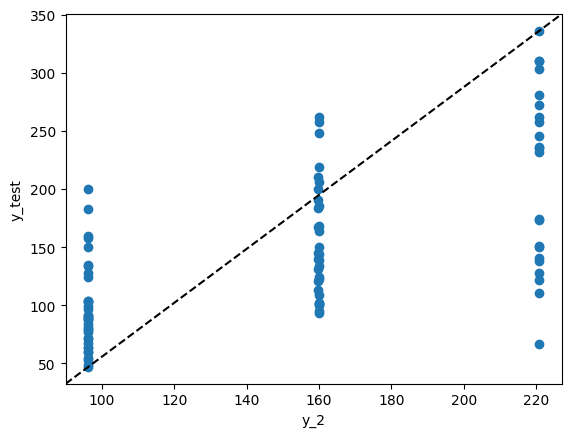

In [27]:
plt.scatter(y_2, 
            regYtest, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('y_2')
plt.ylabel('y_test')

In [28]:
# Finally pick the best max_depth you got
# Use this max_depth, and use cross_val_score and fit your model with k = 10 fold size
# Calculate average scores in kfold
'''
Best max_depth = 2

'''

from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
scores = cross_val_score(regr_2, diabetes.data, diabetes.target, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.28897364 0.16168834 0.30122639 0.48723453 0.30735793 0.5135879
 0.29810844 0.01757394 0.15153891 0.55875239]
Average cross-validation score: 0.31


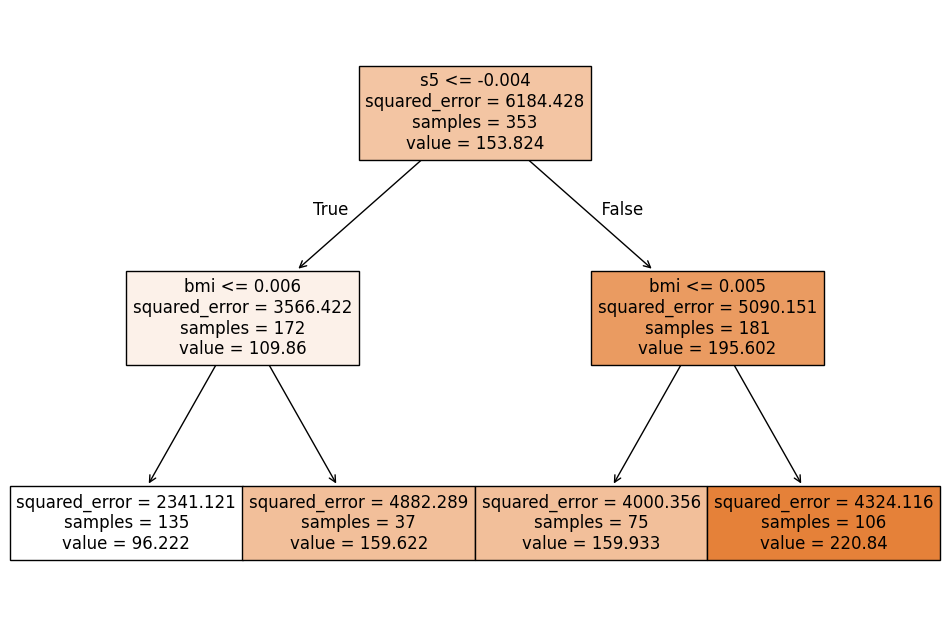

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# If regr_4 is a trained DecisionTreeRegressor (or DecisionTreeClassifier), just do:
# NOTE: replace the regr_4 with the regr model with the lowest MSE
plt.figure(figsize=(12, 8))  # optional, sets a larger figure size
plot_tree(regr_2, 
          feature_names=diabetes.feature_names,
          filled=True)
plt.show()

In [31]:
# Answer the questions: 

'''
1. What is the most important indicator that indicate diabetes?
'''

'''
Your answer goes here: 
BMI being less than or equal to 0.006


'''
print()

### 2. Decision Tree with Bagging 
---



---

***EXERCISE NO. 2.1 | Score :20***

In [32]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

from sklearn.ensemble import BaggingRegressor

# Use BaggingRegressor to fit the training data
# Calculate the mean squared error 

#load BaggingRegressor model and pass n_estimators=20, random_state=1
bagged_regr = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=20, random_state=1)
bagged_regr.fit(regXtrain, regYtrain)
pred = bagged_regr.predict(regXtest)
mean_squared_error(regYtest, pred)

2829.643848314607

Text(0, 0.5, 'y_test')

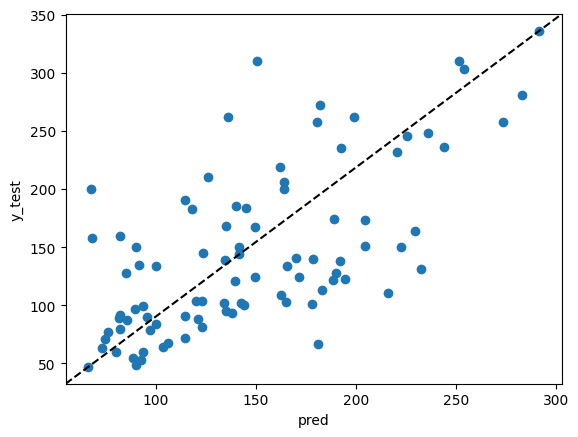

In [33]:
plt.scatter(pred, 
            regYtest, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

In [36]:
# Answer the following questions: 
'''
1. Does Begging improve the MSE(mean squared error) from a single decision tree with best max_depth, and why? 
2. Comparing to the single decision tree scatter plot, what do you observed from the begging decision trees scatter plot?  
'''

'''
Your answer goes here: 
Yes, the mean squared error has improved by indroducing randomness in each base regressor then averaging, 
the regression has less chances to cause variance
The bagging decision tree scatter plot actually resembles a scatter plot over the single decision tree scatter plot
'''
print()

### 3. Random Forest 
---



---

***EXERCISE NO. 3.1 | Score :20***

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

from sklearn.ensemble import RandomForestRegressor

# Use RandomForestRegressor to fit the training data
# Calculate the mean squared error 

# load RandomForestRegressor model and pass max_features=6, n_estimater=20, random_state=1
random_forest_regr = RandomForestRegressor(max_features=6, n_estimators=20, random_state=1)
random_forest_regr.fit(regXtrain, regYtrain)
pred = random_forest_regr.predict(regXtest)

mean_squared_error(regYtest, pred)

2751.859606741573

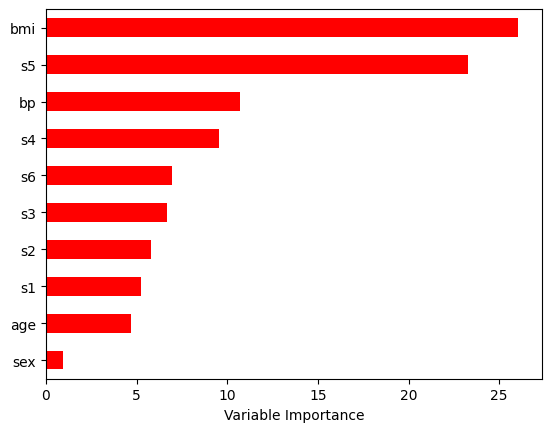

In [37]:
# Plot the importance rank of each feature in the diabeties dataset 
import pandas as pd
Importance = pd.DataFrame({'Importance':random_forest_regr.feature_importances_*100}, 
                          index = diabetes.feature_names)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [38]:
#Answer the following questions: 
'''
1. Does Random Forest improve the MSE(mean squared error) from a single decision tree with best max_depth and Bagging, and why? 
2. What is the most important indicator that indicate diabetes?
'''

'''
Your answer goes here: 
Yes, because we introduce randomness in each tree node further reducing variance and over-fitting
The most important indicator is BMI
'''
print()

### 4. Boosting 
---



---

***EXERCISE NO. 4.1 | Score :20***

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor

# Use GradientBoostingRegressor to fit the training data
# Calculate the mean squared error 

# load GradientBoostingRegressor model and pass n_estimators = 500, learning_rate = 0.01, max_depth = 2, random_state = 1
boosted_regr = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 2, random_state = 1)
boosted_regr.fit(regXtrain, regYtrain)
pred = boosted_regr.predict(regXtest)

mean_squared_error(regYtest, pred)

2490.4587852242803

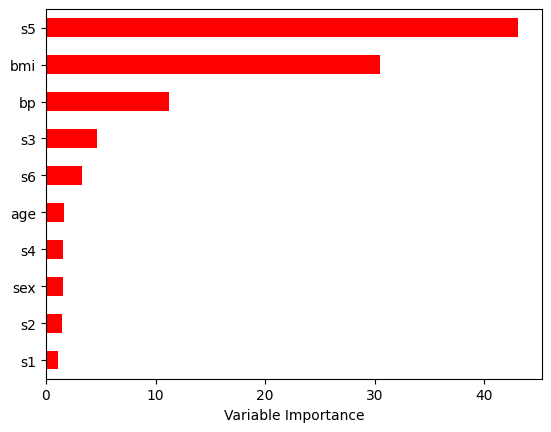

In [41]:
feature_importance = boosted_regr.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = diabetes.feature_names).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

In [42]:
#Answer the following questions: 
'''
1. Does Boosting improve the MSE(mean squared error) from a single decision tree with best max_depth, Bagging, and Random Forest, and why? 
2. What is the most important indicator that indicate diabetes?
'''

'''
Your answer goes here: 
It does improve the MSE by creating new training sets from misclassified trees to build upon errors, learning from mistakes
The importance now is s5 over bmi previously
'''
print()